In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
dataframe = pd.read_csv("car.data.csv")


In [3]:
dataframe.head(10)

,COST,MAINTAIN COST,DOORS,PERSON,BOOT SPACE,SAFTEY,VALUE
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:

df_label = dataframe['VALUE']
df_features = dataframe.drop('VALUE', 1)



print(df_label.head(2000))
df_features.head(2000)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
5       unacc
6       unacc
7       unacc
8       unacc
9       unacc
10      unacc
11      unacc
12      unacc
13      unacc
14      unacc
15      unacc
16      unacc
17      unacc
18      unacc
19      unacc
20      unacc
21      unacc
22      unacc
23      unacc
24      unacc
25      unacc
26      unacc
27      unacc
28      unacc
29      unacc
        ...  
1698    unacc
1699     good
1700    vgood
1701    unacc
1702    unacc
1703    unacc
1704    unacc
1705    unacc
1706    unacc
1707    unacc
1708    unacc
1709    unacc
1710    unacc
1711      acc
1712     good
1713    unacc
1714     good
1715    vgood
1716    unacc
1717     good
1718    vgood
1719    unacc
1720      acc
1721     good
1722    unacc
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: VALUE, Length: 1728, dtype: object


,COST,MAINTAIN COST,DOORS,PERSON,BOOT SPACE,SAFTEY
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [5]:

df_label.replace('unacc', 1, inplace=True)
df_label.replace('acc', 2, inplace=True)
df_label.replace('good', 3, inplace=True)
df_label.replace('vgood', 4, inplace=True)



    
df_features['COST'].replace('vhigh', 4, inplace=True)
df_features['COST'].replace('high', 3, inplace=True)
df_features['COST'].replace('med', 2, inplace=True)
df_features['COST'].replace('low', 1, inplace=True)


df_features['MAINTAIN COST'].replace('vhigh', 4, inplace=True)
df_features['MAINTAIN COST'].replace('high', 3, inplace=True)
df_features['MAINTAIN COST'].replace('med', 2, inplace=True)
df_features['MAINTAIN COST'].replace('low', 1, inplace=True)




df_features['DOORS'].replace('5more', 4, inplace=True)
df_features['DOORS'].replace('2',  1, inplace=True)
df_features['DOORS'].replace('3',  2, inplace=True)
df_features['DOORS'].replace('4',  3, inplace=True)




df_features['PERSON'].replace('2',  1, inplace=True)
df_features['PERSON'].replace('4',  2, inplace=True)
df_features['PERSON'].replace('more',  3, inplace=True)




df_features['BOOT SPACE'].replace('small', 1, inplace=True)
df_features['BOOT SPACE'].replace('med', 2, inplace=True)
df_features['BOOT SPACE'].replace('big', 3, inplace=True)


df_features['SAFTEY'].replace('high', 3, inplace=True)
df_features['SAFTEY'].replace('med', 2, inplace=True)
df_features['SAFTEY'].replace('low', 1, inplace=True)


df_features.head(2000)

,COST,MAINTAIN COST,DOORS,PERSON,BOOT SPACE,SAFTEY
0,4,4,1,1,1,1
1,4,4,1,1,1,2
2,4,4,1,1,1,3
3,4,4,1,1,2,1
4,4,4,1,1,2,2
5,4,4,1,1,2,3
6,4,4,1,1,3,1
7,4,4,1,1,3,2
8,4,4,1,1,3,3
9,4,4,1,2,1,1


In [6]:

data = np.array(df_features)
label = np.array(df_label)
print(data.shape,label.shape)
print(data)
print(label)


(1728, 6) (1728,)
[[4 4 1 1 1 1]
 [4 4 1 1 1 2]
 [4 4 1 1 1 3]
 ...
 [1 1 4 3 3 1]
 [1 1 4 3 3 2]
 [1 1 4 3 3 3]]
[1 1 1 ... 1 3 4]


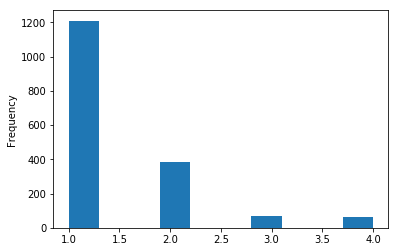

In [7]:
df_label.plot.hist()

Text(0.5,1,'cost vs acc')

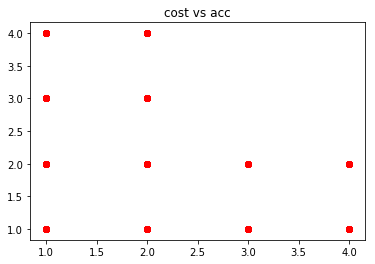

In [8]:
plt.scatter(df_label, df_features['COST'] ,color='red', s=30)
plt.title('cost vs acc')

Text(0.5,1,' MAINTAIN COST vs ACC')

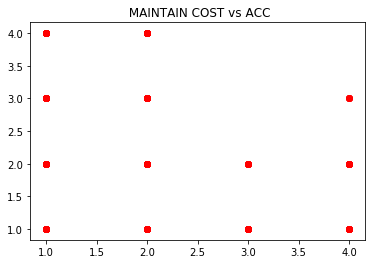

In [9]:
plt.scatter(df_label, df_features['MAINTAIN COST'] ,color='red', s=30)
plt.title(' MAINTAIN COST vs ACC')

Text(0.5,1,' BOOT SPACE vs ACC')

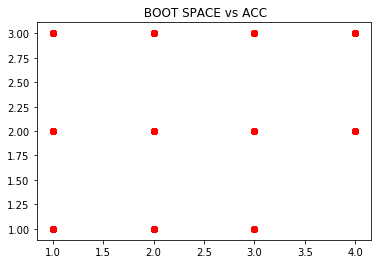

In [10]:
plt.scatter(df_label, df_features['BOOT SPACE'] ,color='red', s=30)
plt.title(' BOOT SPACE vs ACC')

Text(0.5,1,' SAFTEY vs ACC')

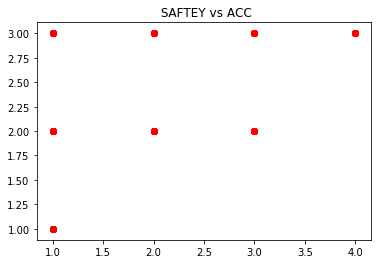

In [11]:
plt.scatter(df_label, df_features['SAFTEY'] ,color='red', s=30)
plt.title(' SAFTEY vs ACC')

Text(0.5,1,'PERSON vs ACC')

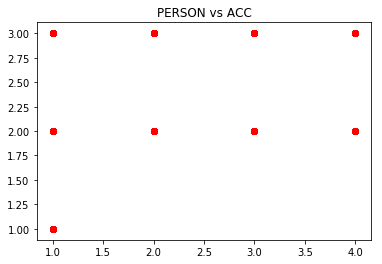

In [12]:
plt.scatter(df_label, df_features['PERSON'] ,color='red', s=30)
plt.title('PERSON vs ACC')

Text(0.5,1,'DOOR vs ACC')

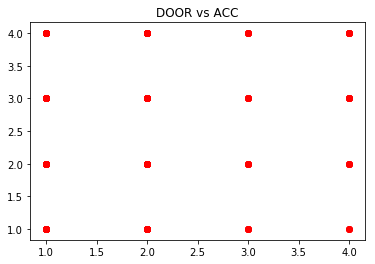

In [13]:
plt.scatter(df_label, df_features['DOORS'] ,color='red', s=30)
plt.title('DOOR vs ACC')

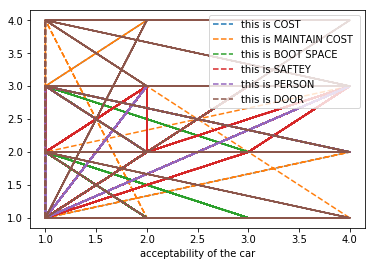

In [14]:
plt.plot(df_label, df_features['COST'], '--')
plt.plot(df_label, df_features['MAINTAIN COST'], '--')
plt.plot(df_label, df_features['BOOT SPACE'], '--')
plt.plot(df_label, df_features['SAFTEY'], '--')
plt.plot(df_label, df_features['PERSON'], '--')
plt.plot(df_label, df_features['DOORS'], '--')

plt.xlabel("acceptability of the car")
plt.legend(["this is COST","this is MAINTAIN COST ", "this is BOOT SPACE ", "this is SAFTEY", "this is PERSON", "this is DOOR"])

In [15]:
model = TSNE(learning_rate=100)

In [24]:
transformed = model.fit_transform(df_features)

In [25]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

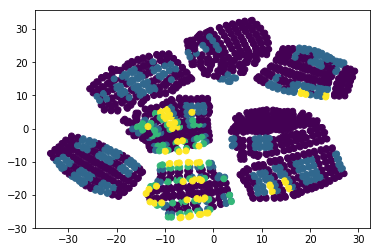

In [26]:
plt.scatter(x_axis, y_axis, c=df_label)
plt.show()


In [27]:
print(df_label)
label2=[]
for lab in df_label:
    if lab == 1:
        label2.append([1,0,0,0])
    elif lab==2:
        label2.append([0,1,0,0])
    elif lab==3:
        label2.append([0,0,1,0])
    elif lab==4:
        label2.append([0,0,0,1])
print(label2)
label3 = np.array(label2)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1698    1
1699    3
1700    4
1701    1
1702    1
1703    1
1704    1
1705    1
1706    1
1707    1
1708    1
1709    1
1710    1
1711    2
1712    3
1713    1
1714    3
1715    4
1716    1
1717    3
1718    4
1719    1
1720    2
1721    3
1722    1
1723    3
1724    4
1725    1
1726    3
1727    4
Name: VALUE, Length: 1728, dtype: int64
[[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0],

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, label3, test_size=0.3, random_state=42)
x_train.shape
print(x_test.shape)
y_test.shape


(519, 6)


(519, 4)

In [29]:
model2 = Sequential()
model2.add(Dense(500, input_dim = 6, activation = 'sigmoid'))
model2.add(Dense(300, activation='tanh' ))
model2.add(Dense(4, activation = 'softmax'))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model2.fit(data, label3, epochs =1000, batch_size = 70, validation_data = (x_test,y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1728 samples, validate on 519 samples
Epoch 1/1000
1728/1728 [==============================] - 0s 232us/step - loss: 0.1328 - acc: 0.6632 - val_loss: 0.1133 - val_acc: 0.6898
Epoch 2/1000
1728/1728 [==============================] - 0s 90us/step - loss: 0.1090 - acc: 0.7043 - val_loss: 0.1184 - val_acc: 0.6898
Epoch 3/1000
1728/1728 [==============================] - 0s 92us/step - loss: 0.1001 - acc: 0.7118 - val_loss: 0.0994 - val_acc: 0.6898
Epoch 4/1000
1728/1728 [==============================] - 0s 87us/step - loss: 0.0934 - acc: 0.7332 - val_loss: 0.1009 - val_acc: 0.7457
Epoch 5/1000
1728/1728 [==============================] - 0s 81us/step - loss: 0.0909 - acc: 0.7494 - val_loss: 0.0876 - val_acc: 0.7842
Epoch 6/1000
1728/1728 [==============================] - 0s 110us/step - loss: 0.0869 - acc: 0.7598 - val_loss: 0.0858 - val_acc: 0.7476
Epoch 7/1

1728/1728 [==============================] - 0s 120us/step - loss: 0.0632 - acc: 0.8241 - val_loss: 0.0626 - val_acc: 0.8304
Epoch 57/1000
1728/1728 [==============================] - 0s 109us/step - loss: 0.0644 - acc: 0.8160 - val_loss: 0.0625 - val_acc: 0.8285
Epoch 58/1000
1728/1728 [==============================] - 0s 120us/step - loss: 0.0641 - acc: 0.8299 - val_loss: 0.0696 - val_acc: 0.8015
Epoch 59/1000
1728/1728 [==============================] - 0s 113us/step - loss: 0.0648 - acc: 0.8229 - val_loss: 0.0664 - val_acc: 0.8092
Epoch 60/1000
1728/1728 [==============================] - 0s 106us/step - loss: 0.0622 - acc: 0.8304 - val_loss: 0.0614 - val_acc: 0.8401
Epoch 61/1000
1728/1728 [==============================] - 0s 139us/step - loss: 0.0616 - acc: 0.8264 - val_loss: 0.0680 - val_acc: 0.8092
Epoch 62/1000
1728/1728 [==============================] - 0s 115us/step - loss: 0.0632 - acc: 0.8235 - val_loss: 0.0608 - val_acc: 0.8439
Epoch 63/1000
1728/1728 [================

1728/1728 [==============================] - 0s 116us/step - loss: 0.0418 - acc: 0.8906 - val_loss: 0.0449 - val_acc: 0.8805
Epoch 115/1000
1728/1728 [==============================] - 0s 123us/step - loss: 0.0383 - acc: 0.9010 - val_loss: 0.0378 - val_acc: 0.8998
Epoch 116/1000
1728/1728 [==============================] - 0s 106us/step - loss: 0.0383 - acc: 0.9022 - val_loss: 0.0380 - val_acc: 0.8960
Epoch 117/1000
1728/1728 [==============================] - 0s 107us/step - loss: 0.0398 - acc: 0.9022 - val_loss: 0.0390 - val_acc: 0.8998
Epoch 118/1000
1728/1728 [==============================] - 0s 118us/step - loss: 0.0380 - acc: 0.9057 - val_loss: 0.0372 - val_acc: 0.8979
Epoch 119/1000
1728/1728 [==============================] - 0s 115us/step - loss: 0.0381 - acc: 0.8999 - val_loss: 0.0385 - val_acc: 0.8998
Epoch 120/1000
1728/1728 [==============================] - 0s 102us/step - loss: 0.0377 - acc: 0.9028 - val_loss: 0.0365 - val_acc: 0.9037
Epoch 121/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 140us/step - loss: 0.0303 - acc: 0.9236 - val_loss: 0.0288 - val_acc: 0.9249
Epoch 173/1000
1728/1728 [==============================] - 0s 123us/step - loss: 0.0301 - acc: 0.9219 - val_loss: 0.0278 - val_acc: 0.9306
Epoch 174/1000
1728/1728 [==============================] - 0s 149us/step - loss: 0.0304 - acc: 0.9242 - val_loss: 0.0328 - val_acc: 0.9210
Epoch 175/1000
1728/1728 [==============================] - 0s 126us/step - loss: 0.0305 - acc: 0.9259 - val_loss: 0.0276 - val_acc: 0.9306
Epoch 176/1000
1728/1728 [==============================] - 0s 124us/step - loss: 0.0305 - acc: 0.9225 - val_loss: 0.0316 - val_acc: 0.9306
Epoch 177/1000
1728/1728 [==============================] - 0s 130us/step - loss: 0.0317 - acc: 0.9207 - val_loss: 0.0291 - val_acc: 0.9229
Epoch 178/1000
1728/1728 [==============================] - 0s 159us/step - loss: 0.0299 - acc: 0.9242 - val_loss: 0.0382 - val_acc: 0.8882
Epoch 179/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 145us/step - loss: 0.0243 - acc: 0.9416 - val_loss: 0.0222 - val_acc: 0.9461
Epoch 231/1000
1728/1728 [==============================] - 0s 141us/step - loss: 0.0243 - acc: 0.9352 - val_loss: 0.0241 - val_acc: 0.9422
Epoch 232/1000
1728/1728 [==============================] - 0s 136us/step - loss: 0.0261 - acc: 0.9346 - val_loss: 0.0231 - val_acc: 0.9403
Epoch 233/1000
1728/1728 [==============================] - 0s 156us/step - loss: 0.0241 - acc: 0.9416 - val_loss: 0.0219 - val_acc: 0.9441
Epoch 234/1000
1728/1728 [==============================] - 0s 164us/step - loss: 0.0275 - acc: 0.9277 - val_loss: 0.0242 - val_acc: 0.9345
Epoch 235/1000
1728/1728 [==============================] - 0s 126us/step - loss: 0.0249 - acc: 0.9387 - val_loss: 0.0226 - val_acc: 0.9422
Epoch 236/1000
1728/1728 [==============================] - 0s 128us/step - loss: 0.0232 - acc: 0.9404 - val_loss: 0.0213 - val_acc: 0.9461
Epoch 237/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 133us/step - loss: 0.0197 - acc: 0.9468 - val_loss: 0.0171 - val_acc: 0.9615
Epoch 289/1000
1728/1728 [==============================] - 0s 141us/step - loss: 0.0192 - acc: 0.9531 - val_loss: 0.0176 - val_acc: 0.9538
Epoch 290/1000
1728/1728 [==============================] - 0s 139us/step - loss: 0.0195 - acc: 0.9485 - val_loss: 0.0186 - val_acc: 0.9518
Epoch 291/1000
1728/1728 [==============================] - 0s 115us/step - loss: 0.0201 - acc: 0.9485 - val_loss: 0.0180 - val_acc: 0.9538
Epoch 292/1000
1728/1728 [==============================] - 0s 140us/step - loss: 0.0194 - acc: 0.9520 - val_loss: 0.0172 - val_acc: 0.9576
Epoch 293/1000
1728/1728 [==============================] - 0s 119us/step - loss: 0.0193 - acc: 0.9502 - val_loss: 0.0180 - val_acc: 0.9557
Epoch 294/1000
1728/1728 [==============================] - 0s 124us/step - loss: 0.0194 - acc: 0.9502 - val_loss: 0.0202 - val_acc: 0.9441
Epoch 295/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 146us/step - loss: 0.0185 - acc: 0.9537 - val_loss: 0.0160 - val_acc: 0.9595
Epoch 347/1000
1728/1728 [==============================] - 0s 122us/step - loss: 0.0164 - acc: 0.9583 - val_loss: 0.0153 - val_acc: 0.9634
Epoch 348/1000
1728/1728 [==============================] - 0s 119us/step - loss: 0.0164 - acc: 0.9595 - val_loss: 0.0147 - val_acc: 0.9634
Epoch 349/1000
1728/1728 [==============================] - 0s 136us/step - loss: 0.0166 - acc: 0.9583 - val_loss: 0.0150 - val_acc: 0.9634
Epoch 350/1000
1728/1728 [==============================] - 0s 112us/step - loss: 0.0160 - acc: 0.9595 - val_loss: 0.0146 - val_acc: 0.9634
Epoch 351/1000
1728/1728 [==============================] - 0s 132us/step - loss: 0.0184 - acc: 0.9502 - val_loss: 0.0170 - val_acc: 0.9576
Epoch 352/1000
1728/1728 [==============================] - 0s 132us/step - loss: 0.0180 - acc: 0.9514 - val_loss: 0.0155 - val_acc: 0.9634
Epoch 353/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 141us/step - loss: 0.0151 - acc: 0.9601 - val_loss: 0.0141 - val_acc: 0.9634
Epoch 405/1000
1728/1728 [==============================] - 0s 134us/step - loss: 0.0152 - acc: 0.9595 - val_loss: 0.0137 - val_acc: 0.9634
Epoch 406/1000
1728/1728 [==============================] - 0s 133us/step - loss: 0.0154 - acc: 0.9595 - val_loss: 0.0142 - val_acc: 0.9634
Epoch 407/1000
1728/1728 [==============================] - 0s 122us/step - loss: 0.0152 - acc: 0.9601 - val_loss: 0.0139 - val_acc: 0.9634
Epoch 408/1000
1728/1728 [==============================] - 0s 136us/step - loss: 0.0153 - acc: 0.9583 - val_loss: 0.0136 - val_acc: 0.9634
Epoch 409/1000
1728/1728 [==============================] - 0s 135us/step - loss: 0.0152 - acc: 0.9601 - val_loss: 0.0140 - val_acc: 0.9634
Epoch 410/1000
1728/1728 [==============================] - 0s 141us/step - loss: 0.0151 - acc: 0.9601 - val_loss: 0.0152 - val_acc: 0.9595
Epoch 411/1000
1728/1728 [=========

1728/1728 [==============================] - 0s 131us/step - loss: 0.0143 - acc: 0.9601 - val_loss: 0.0131 - val_acc: 0.9634
Epoch 463/1000
1728/1728 [==============================] - 0s 125us/step - loss: 0.0144 - acc: 0.9601 - val_loss: 0.0136 - val_acc: 0.9634
Epoch 464/1000
1728/1728 [==============================] - 0s 116us/step - loss: 0.0147 - acc: 0.9601 - val_loss: 0.0133 - val_acc: 0.9634
Epoch 465/1000
1728/1728 [==============================] - 0s 144us/step - loss: 0.0143 - acc: 0.9601 - val_loss: 0.0152 - val_acc: 0.9576
Epoch 466/1000
1728/1728 [==============================] - 0s 126us/step - loss: 0.0160 - acc: 0.9554 - val_loss: 0.0145 - val_acc: 0.9595
Epoch 467/1000
1728/1728 [==============================] - 0s 130us/step - loss: 0.0153 - acc: 0.9583 - val_loss: 0.0139 - val_acc: 0.9634
Epoch 468/1000
1728/1728 [==============================] - 0s 130us/step - loss: 0.0152 - acc: 0.9578 - val_loss: 0.0131 - val_acc: 0.9634
Epoch 469/1000
1728/1728 [=========

Epoch 520/1000
1728/1728 [==============================] - 0s 152us/step - loss: 6.2111e-04 - acc: 1.0000 - val_loss: 4.9587e-04 - val_acc: 1.0000
Epoch 521/1000
1728/1728 [==============================] - 0s 148us/step - loss: 6.3115e-04 - acc: 1.0000 - val_loss: 4.8641e-04 - val_acc: 1.0000
Epoch 522/1000
1728/1728 [==============================] - 0s 148us/step - loss: 4.8348e-04 - acc: 1.0000 - val_loss: 5.4936e-04 - val_acc: 1.0000
Epoch 523/1000
1728/1728 [==============================] - 0s 130us/step - loss: 5.6201e-04 - acc: 1.0000 - val_loss: 6.7805e-04 - val_acc: 1.0000
Epoch 524/1000
1728/1728 [==============================] - 0s 124us/step - loss: 5.3737e-04 - acc: 1.0000 - val_loss: 6.7473e-04 - val_acc: 1.0000
Epoch 525/1000
1728/1728 [==============================] - 0s 123us/step - loss: 4.8222e-04 - acc: 0.9994 - val_loss: 7.9162e-04 - val_acc: 1.0000
Epoch 526/1000
1728/1728 [==============================] - 0s 132us/step - loss: 6.7353e-04 - acc: 0.9994 - val

1728/1728 [==============================] - 0s 128us/step - loss: 1.7728e-04 - acc: 1.0000 - val_loss: 1.4715e-04 - val_acc: 1.0000
Epoch 576/1000
1728/1728 [==============================] - 0s 151us/step - loss: 1.5925e-04 - acc: 1.0000 - val_loss: 1.3428e-04 - val_acc: 1.0000
Epoch 577/1000
1728/1728 [==============================] - 0s 141us/step - loss: 1.4037e-04 - acc: 1.0000 - val_loss: 1.5138e-04 - val_acc: 1.0000
Epoch 578/1000
1728/1728 [==============================] - 0s 142us/step - loss: 1.4082e-04 - acc: 1.0000 - val_loss: 1.5479e-04 - val_acc: 1.0000
Epoch 579/1000
1728/1728 [==============================] - 0s 134us/step - loss: 1.5891e-04 - acc: 1.0000 - val_loss: 2.0107e-04 - val_acc: 1.0000
Epoch 580/1000
1728/1728 [==============================] - 0s 125us/step - loss: 1.5868e-04 - acc: 1.0000 - val_loss: 1.7118e-04 - val_acc: 1.0000
Epoch 581/1000
1728/1728 [==============================] - 0s 156us/step - loss: 1.7249e-04 - acc: 1.0000 - val_loss: 2.3110e-

Epoch 631/1000
1728/1728 [==============================] - 0s 139us/step - loss: 6.1399e-05 - acc: 1.0000 - val_loss: 9.0843e-05 - val_acc: 1.0000
Epoch 632/1000
1728/1728 [==============================] - 0s 122us/step - loss: 6.0748e-05 - acc: 1.0000 - val_loss: 5.8176e-05 - val_acc: 1.0000
Epoch 633/1000
1728/1728 [==============================] - 0s 144us/step - loss: 5.6938e-05 - acc: 1.0000 - val_loss: 7.7842e-05 - val_acc: 1.0000
Epoch 634/1000
1728/1728 [==============================] - 0s 130us/step - loss: 5.3590e-05 - acc: 1.0000 - val_loss: 5.5699e-05 - val_acc: 1.0000
Epoch 635/1000
1728/1728 [==============================] - 0s 144us/step - loss: 5.4782e-05 - acc: 1.0000 - val_loss: 7.6969e-05 - val_acc: 1.0000
Epoch 636/1000
1728/1728 [==============================] - 0s 156us/step - loss: 5.8291e-05 - acc: 1.0000 - val_loss: 5.7083e-05 - val_acc: 1.0000
Epoch 637/1000
1728/1728 [==============================] - 0s 139us/step - loss: 5.8143e-05 - acc: 1.0000 - val

1728/1728 [==============================] - 0s 142us/step - loss: 7.4075e-05 - acc: 1.0000 - val_loss: 9.1824e-05 - val_acc: 1.0000
Epoch 687/1000
1728/1728 [==============================] - 0s 128us/step - loss: 7.8433e-05 - acc: 1.0000 - val_loss: 4.9129e-05 - val_acc: 1.0000
Epoch 688/1000
1728/1728 [==============================] - 0s 157us/step - loss: 4.6566e-05 - acc: 1.0000 - val_loss: 4.0446e-05 - val_acc: 1.0000
Epoch 689/1000
1728/1728 [==============================] - 0s 132us/step - loss: 4.2709e-05 - acc: 1.0000 - val_loss: 3.6054e-05 - val_acc: 1.0000
Epoch 690/1000
1728/1728 [==============================] - 0s 136us/step - loss: 3.6580e-05 - acc: 1.0000 - val_loss: 3.8933e-05 - val_acc: 1.0000
Epoch 691/1000
1728/1728 [==============================] - 0s 126us/step - loss: 3.5297e-05 - acc: 1.0000 - val_loss: 2.7129e-05 - val_acc: 1.0000
Epoch 692/1000
1728/1728 [==============================] - 0s 174us/step - loss: 3.2978e-05 - acc: 1.0000 - val_loss: 2.7153e-

1728/1728 [==============================] - 0s 171us/step - loss: 1.9552e-05 - acc: 1.0000 - val_loss: 1.5494e-05 - val_acc: 1.0000
Epoch 742/1000
1728/1728 [==============================] - 0s 161us/step - loss: 1.6983e-05 - acc: 1.0000 - val_loss: 2.6579e-05 - val_acc: 1.0000
Epoch 743/1000
1728/1728 [==============================] - 0s 168us/step - loss: 1.7760e-05 - acc: 1.0000 - val_loss: 1.8787e-05 - val_acc: 1.0000
Epoch 744/1000
1728/1728 [==============================] - 0s 137us/step - loss: 1.8405e-05 - acc: 1.0000 - val_loss: 1.8031e-05 - val_acc: 1.0000
Epoch 745/1000
1728/1728 [==============================] - 0s 143us/step - loss: 1.7281e-05 - acc: 1.0000 - val_loss: 1.6097e-05 - val_acc: 1.0000
Epoch 746/1000
1728/1728 [==============================] - 0s 146us/step - loss: 1.6938e-05 - acc: 1.0000 - val_loss: 1.6350e-05 - val_acc: 1.0000
Epoch 747/1000
1728/1728 [==============================] - 0s 126us/step - loss: 2.3340e-05 - acc: 1.0000 - val_loss: 2.2511e-

Epoch 797/1000
1728/1728 [==============================] - 0s 149us/step - loss: 2.2411e-05 - acc: 1.0000 - val_loss: 2.1113e-05 - val_acc: 1.0000
Epoch 798/1000
1728/1728 [==============================] - 0s 171us/step - loss: 2.1482e-05 - acc: 1.0000 - val_loss: 2.3741e-05 - val_acc: 1.0000
Epoch 799/1000
1728/1728 [==============================] - 0s 153us/step - loss: 2.1175e-05 - acc: 1.0000 - val_loss: 2.0948e-05 - val_acc: 1.0000
Epoch 800/1000
1728/1728 [==============================] - 0s 154us/step - loss: 2.0368e-05 - acc: 1.0000 - val_loss: 2.0624e-05 - val_acc: 1.0000
Epoch 801/1000
1728/1728 [==============================] - 0s 133us/step - loss: 2.0522e-05 - acc: 1.0000 - val_loss: 2.1078e-05 - val_acc: 1.0000
Epoch 802/1000
1728/1728 [==============================] - 0s 121us/step - loss: 2.1076e-05 - acc: 1.0000 - val_loss: 1.9196e-05 - val_acc: 1.0000
Epoch 803/1000
1728/1728 [==============================] - 0s 132us/step - loss: 2.0842e-05 - acc: 1.0000 - val

1728/1728 [==============================] - 0s 124us/step - loss: 1.2158e-05 - acc: 1.0000 - val_loss: 1.1403e-05 - val_acc: 1.0000
Epoch 853/1000
1728/1728 [==============================] - 0s 130us/step - loss: 1.1958e-05 - acc: 1.0000 - val_loss: 1.1538e-05 - val_acc: 1.0000
Epoch 854/1000
1728/1728 [==============================] - 0s 157us/step - loss: 1.1800e-05 - acc: 1.0000 - val_loss: 1.1870e-05 - val_acc: 1.0000
Epoch 855/1000
1728/1728 [==============================] - 0s 139us/step - loss: 1.1822e-05 - acc: 1.0000 - val_loss: 1.1456e-05 - val_acc: 1.0000
Epoch 856/1000
1728/1728 [==============================] - 0s 130us/step - loss: 1.2130e-05 - acc: 1.0000 - val_loss: 1.0944e-05 - val_acc: 1.0000
Epoch 857/1000
1728/1728 [==============================] - 0s 133us/step - loss: 1.1613e-05 - acc: 1.0000 - val_loss: 1.2299e-05 - val_acc: 1.0000
Epoch 858/1000
1728/1728 [==============================] - 0s 136us/step - loss: 1.2015e-05 - acc: 1.0000 - val_loss: 1.0717e-

1728/1728 [==============================] - 0s 152us/step - loss: 8.6212e-06 - acc: 1.0000 - val_loss: 7.2062e-06 - val_acc: 1.0000
Epoch 908/1000
1728/1728 [==============================] - 0s 139us/step - loss: 7.8594e-06 - acc: 1.0000 - val_loss: 7.3630e-06 - val_acc: 1.0000
Epoch 909/1000
1728/1728 [==============================] - 0s 178us/step - loss: 7.9156e-06 - acc: 1.0000 - val_loss: 7.3035e-06 - val_acc: 1.0000
Epoch 910/1000
1728/1728 [==============================] - 0s 138us/step - loss: 7.7714e-06 - acc: 1.0000 - val_loss: 7.3884e-06 - val_acc: 1.0000
Epoch 911/1000
1728/1728 [==============================] - 0s 145us/step - loss: 7.9882e-06 - acc: 1.0000 - val_loss: 7.8513e-06 - val_acc: 1.0000
Epoch 912/1000
1728/1728 [==============================] - 0s 130us/step - loss: 7.9103e-06 - acc: 1.0000 - val_loss: 6.9419e-06 - val_acc: 1.0000
Epoch 913/1000
1728/1728 [==============================] - 0s 132us/step - loss: 7.4440e-06 - acc: 1.0000 - val_loss: 7.0606e-

1728/1728 [==============================] - 0s 135us/step - loss: 5.2249e-06 - acc: 1.0000 - val_loss: 4.3459e-06 - val_acc: 1.0000
Epoch 963/1000
1728/1728 [==============================] - 0s 138us/step - loss: 5.3353e-06 - acc: 1.0000 - val_loss: 4.6558e-06 - val_acc: 1.0000
Epoch 964/1000
1728/1728 [==============================] - 0s 135us/step - loss: 5.2192e-06 - acc: 1.0000 - val_loss: 4.3449e-06 - val_acc: 1.0000
Epoch 965/1000
1728/1728 [==============================] - 0s 132us/step - loss: 5.3454e-06 - acc: 1.0000 - val_loss: 4.5258e-06 - val_acc: 1.0000
Epoch 966/1000
1728/1728 [==============================] - 0s 134us/step - loss: 5.2576e-06 - acc: 1.0000 - val_loss: 5.4331e-06 - val_acc: 1.0000
Epoch 967/1000
1728/1728 [==============================] - 0s 162us/step - loss: 5.1819e-06 - acc: 1.0000 - val_loss: 4.3409e-06 - val_acc: 1.0000
Epoch 968/1000
1728/1728 [==============================] - 0s 158us/step - loss: 4.9187e-06 - acc: 1.0000 - val_loss: 4.3020e-

In [45]:
#COST	MAINTAIN COST	DOORS	PERSON	BOOT SPACE	SAFTEY	VALUE
a=input("enter COST (for low =enter 1/ for med =enter 2/ for high =enter 3/ for vhigh =enter4): ")
b=input("enter MAINTAIN COST(for low =enter 1/ for med =enter 2/ for high =enter 3/ for vhigh =enter4): ")
c=input("enter DOORS(for 2 =enter 1/ for 3 =enter 2/ for 4 =enter 3/ for more =enter4): ")
d=input("enter PERSON(for 2 =enter 1/ for 4 =enter 2/ for more =type 3): ")
e=input("enter BOOT SPACE (for small =enter 1/ for med =enter 2/ for big =enter 3): ")
f=input("enter SAFTEY (for low =enter 1/ for med =enter 2/ for high =enter 3): ")

feature_try = np.array([[a,b,c,d,e,f]])
result = model2.predict_classes(feature_try)

enter COST (for low =enter 1/ for med =enter 2/ for high =enter 3/ for vhigh =enter4): 2
enter MAINTAIN COST(for low =enter 1/ for med =enter 2/ for high =enter 3/ for vhigh =enter4): 2
enter DOORS(for 2 =enter 1/ for 3 =enter 2/ for 4 =enter 3/ for more =enter4): 4
enter PERSON(for 2 =enter 1/ for 4 =enter 2/ for more =type 3): 3
enter BOOT SPACE (for small =enter 1/ for med =enter 2/ for big =enter 3): 3
enter SAFTEY (for low =enter 1/ for med =enter 2/ for high =enter 3): 3


In [46]:
if result==0:
    print("unacc")
elif result==1:
   print("acc")
elif result==2:
   print("good")
elif result==3:
    print("vgood")

vgood
